# Week 9: Independent Lab - Inferential Statistics
Michelle Calderwood | BGEN 632 – Spring 2025

### Load Data

In [41]:
import pandas as pd

# Load the ECT data
ect_df = pd.read_table("data/ect_data.txt")

# Quick inspection
ect_df.info()
ect_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   attitude1_01  201 non-null    int64
 1   attitude1_02  201 non-null    int64
 2   attitude1_03  201 non-null    int64
 3   attitude1_04  201 non-null    int64
 4   intent1_01    201 non-null    int64
 5   intent1_02    201 non-null    int64
 6   intent1_03    201 non-null    int64
 7   intent1_04    201 non-null    int64
 8   peruse01      201 non-null    int64
 9   peruse02      201 non-null    int64
 10  peruse03      201 non-null    int64
 11  peruse04      201 non-null    int64
 12  satis01       201 non-null    int64
 13  satis02       201 non-null    int64
 14  satis03       201 non-null    int64
 15  satis04       201 non-null    int64
dtypes: int64(16)
memory usage: 25.3 KB


,attitude1_01,attitude1_02,attitude1_03,attitude1_04,intent1_01,intent1_02,intent1_03,intent1_04,peruse01,peruse02,peruse03,peruse04,satis01,satis02,satis03,satis04
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,6.094527,6.044776,5.791045,5.890547,6.199005,6.044776,6.258706,5.840796,5.890547,5.601990,5.920398,5.731343,5.512438,5.562189,5.487562,5.343284
std,0.935959,1.073771,1.070570,1.008940,1.019901,1.167470,0.939540,1.069826,1.076086,1.220982,1.154830,1.211389,1.118523,1.160760,1.212887,1.093877
min,3.000000,2.000000,3.000000,3.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,3.000000
25%,6.000000,5.000000,5.000000,5.000000,6.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
50%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000
75%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000,6.000000,6.000000,6.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


### Build Regression Model

In [47]:
import statsmodels.api as sm

# Select 5 valid predictors (avoid intent1_02 to intent1_04)
X = ect_df[['attitude1_01', 'attitude1_02', 'peruse01', 'satis01', 'satis02']]
y = ect_df['intent1_01']

# Add constant
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             intent1_01   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     45.01
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           9.40e-31
Time:                        09:52:43   Log-Likelihood:                -211.54
No. Observations:                 201   AIC:                             435.1
Df Residuals:                     195   BIC:                             454.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9961      0.353      2.826   

### Assess Assumptions

#### Linearity & Homoscedasticity

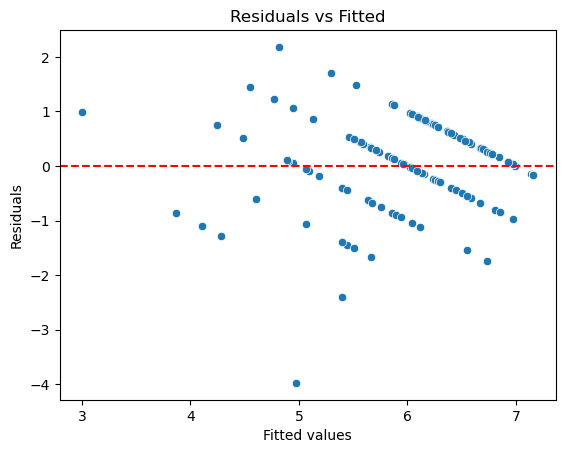

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicted vs. Residuals
residuals = model.resid
fitted = model.fittedvalues

sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title("Residuals vs Fitted")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

#### Collinearity

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

        feature        VIF
0         const  50.439415
1  attitude1_01   3.208845
2  attitude1_02   2.657443
3      peruse01   1.548590
4       satis01   4.484163
5       satis02   4.341000


#### Normaility of Residuals

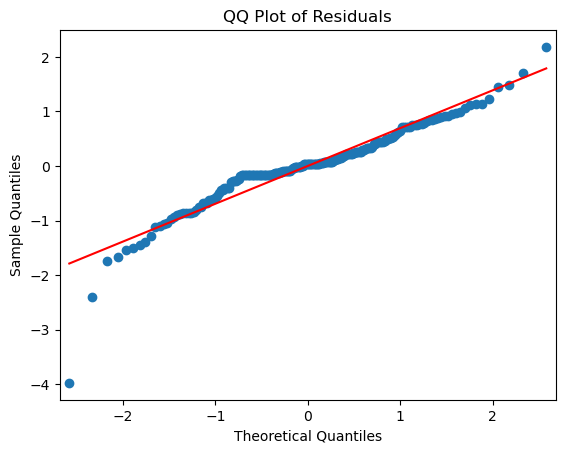

Shapiro-Wilk Test: Statistic=0.9213, p=0.0000


In [53]:
import scipy.stats as stats

# QQ plot
sm.qqplot(residuals, line='s')
plt.title("QQ Plot of Residuals")
plt.show()

# Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic:.4f}, p={shapiro_test.pvalue:.4f}")

#### Independence (Durbin-Watson)

In [55]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuals)
print(f'Durbin-Watson: {dw:.3f}')

Durbin-Watson: 1.929


### Interpretation

#### F-Test – Overall Model Fit

The F-test evaluates whether the group of predictors, taken together, explain a significant portion of variation in the dependent variable.
* F-statistic = 45.01
* p-value < 0.001

This indicates the overall model is statistically significant. At least one predictor significantly contributes to explaining variance in intent1_01.

#### T-Tests – Individual Predictor Significance

Each predictor is tested individually to determine whether its coefficient significantly differs from zero.
* attitude1_01: p = 0.001 — statistically significant
* attitude1_02: p = 0.051 — marginal, borderline significance
* peruse01: p < 0.001 — statistically significant
* satis01: p = 0.077 — not significant at the 0.05 level
* satis02: p = 0.810 — not significant

Only attitude1_01 and peruse01 are clearly significant at the 0.05 level.

#### Business Relevance of Significant Predictors
* attitude1_01: This variable represents employees’ initial attitudes toward the system. Since it is statistically significant with a relatively large coefficient (0.391), it suggests that fostering positive attitudes early (e.g., through awareness campaigns or internal promotion) could drive higher intent to use the system.
* peruse01: This variable likely captures system usage or user curiosity. Its significance (coefficient = 0.234, p < 0.001) suggests that hands-on interaction increases adoption intent. Increasing opportunities to explore or experiment with the system (e.g., test accounts, tutorials) may increase intent to adopt.
#### Model Equation

The linear regression model can be expressed as:

intent1_01 = 0.996 + 0.391 * attitude1_01 
                   + 0.148 * attitude1_02 
                   + 0.234 * peruse01 
                   + 0.167 * satis01 
                   + 0.022 * satis02

Each coefficient represents the expected change in intent1_01 for a one-unit increase in the predictor, holding all other predictors constant.
#### Summary of Model Fit
* R-squared = 0.536
* Adjusted R-squared = 0.524

This indicates that approximately 52.4% of the variation in intent1_01 is explained by the model. This is a reasonably strong model given social science data.
#### Assumption Checks

##### Linearity
* The residuals vs. fitted plot shows roughly linear relationships, though some curvature suggests mild non-linearity.

##### Homoscedasticity
* The spread of residuals in the plot is fairly consistent, with no strong funneling. Mild heteroscedasticity may exist.

##### Collinearity (VIF)
* VIF values were all below 5 (except the constant), suggesting no serious multicollinearity.

attitude1_01: 3.21  
attitude1_02: 2.66  
peruse01: 1.55  
satis01: 4.49
satis02: 4.34

##### Normality
* Shapiro-Wilk test: W = 0.9213, p < 0.001
* QQ plot shows mild skew. Assumption of normality is not fully met, but sample size (n = 201) makes the model robust.

##### Independence
* Durbin-Watson = 1.929
* This is within the acceptable range (~2.0), so residuals are likely independent.

### References

[ChatGPT_Instructor_Lab.ipynb](ChatGPT_Independent.ipynb)